In [1]:
import cv2
import numpy as np
import imutils
import pandas as pd
import matplotlib.pyplot as plt

import statistics

In [2]:
img = cv2.imread('problem2.png')

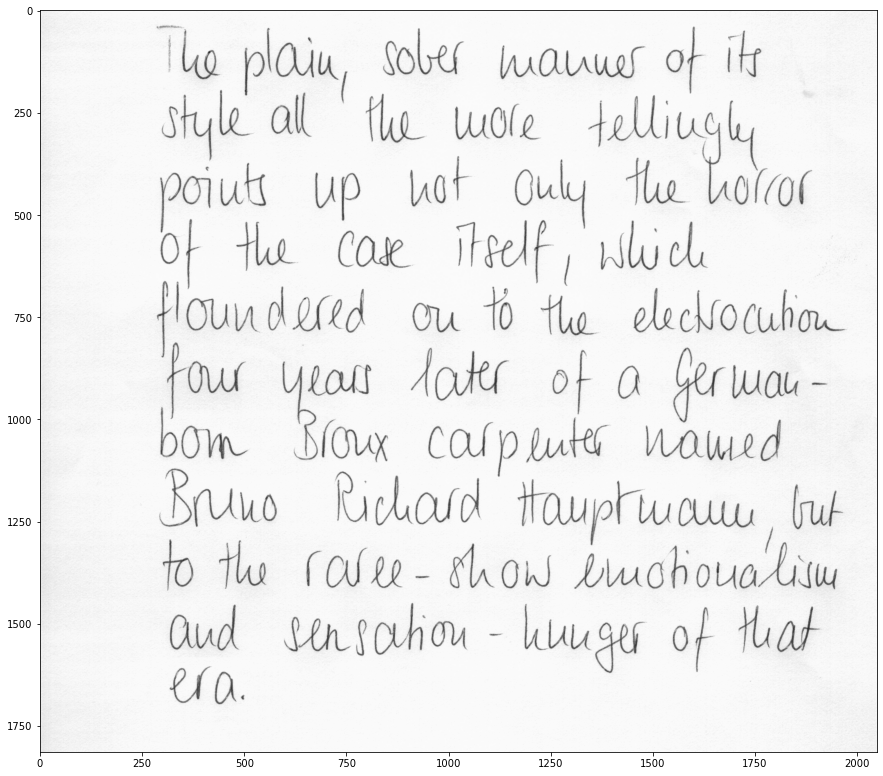

In [3]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)

plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
## (2) threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

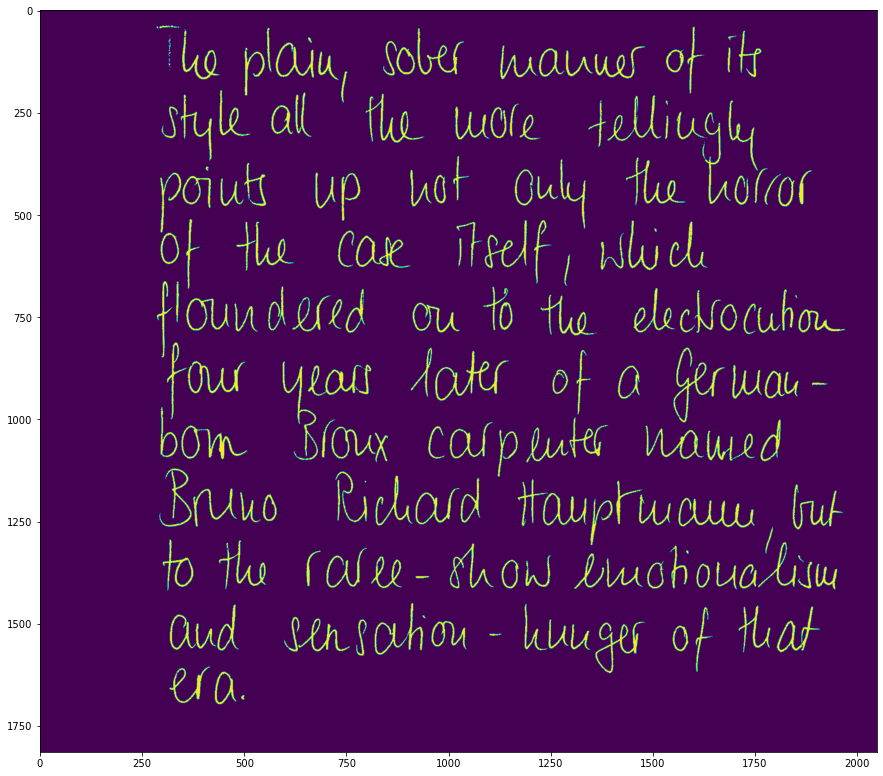

In [7]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)

plt.imshow(threshed)

In [10]:
## find and draw the upper and lower boundary of each lines
hist = cv2.reduce(threshed,1, cv2.REDUCE_AVG).reshape(-1)

th = 2.4
H,W = img.shape[:2]
uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

In [12]:
difference = statistics.stdev(lowers)//10

In [13]:
from itertools import groupby

def runs(difference=difference):
    start = None
    def inner(n):
        nonlocal start
        if start is None:
            start = n
        elif abs(start-n) > difference:
            start = n
        return start
    return inner

In [14]:
lowers = [next(g) for k, g in groupby(lowers, runs())]

In [16]:
for y in lowers:
    cv2.line(img, (0,y), (W, y), (0,255,0), 1)

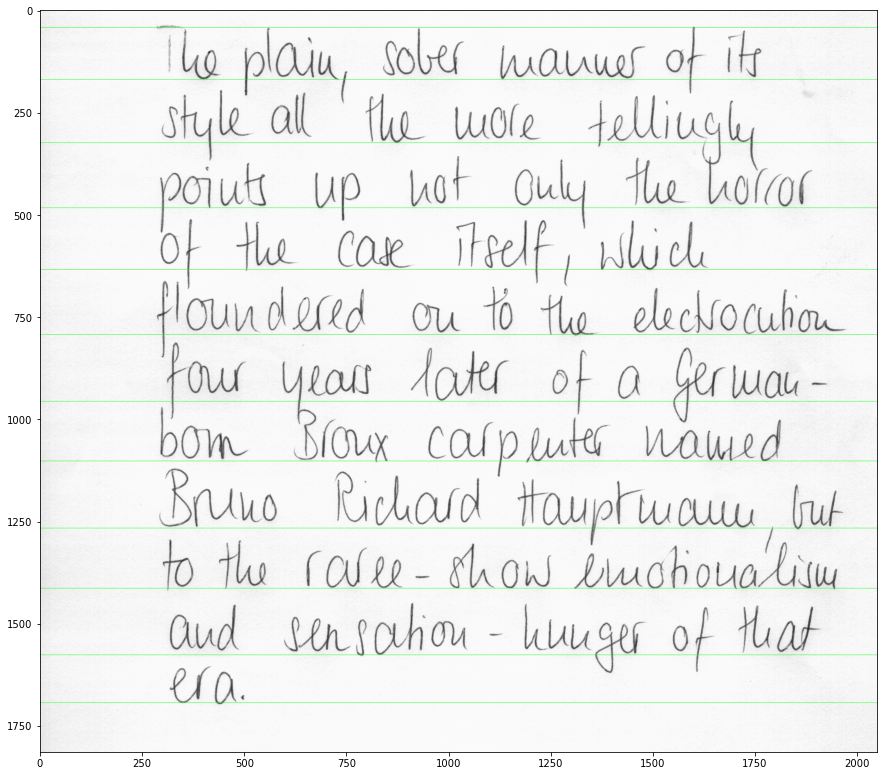

In [17]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)

plt.imshow(img)

In [ ]:
##################################################################################################################
##################################################################################################################

In [126]:
# image = img[634:793,:].copy()
image = img.copy()

In [127]:
# Params
minArea = 500

In [128]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [129]:
#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

In [130]:
#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

In [131]:
#find contours
ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [132]:
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [133]:
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    
    if  w*h > minArea:
        # Getting ROI
        roi = image[y:y+h, x:x+w]

        # show ROI
        cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)

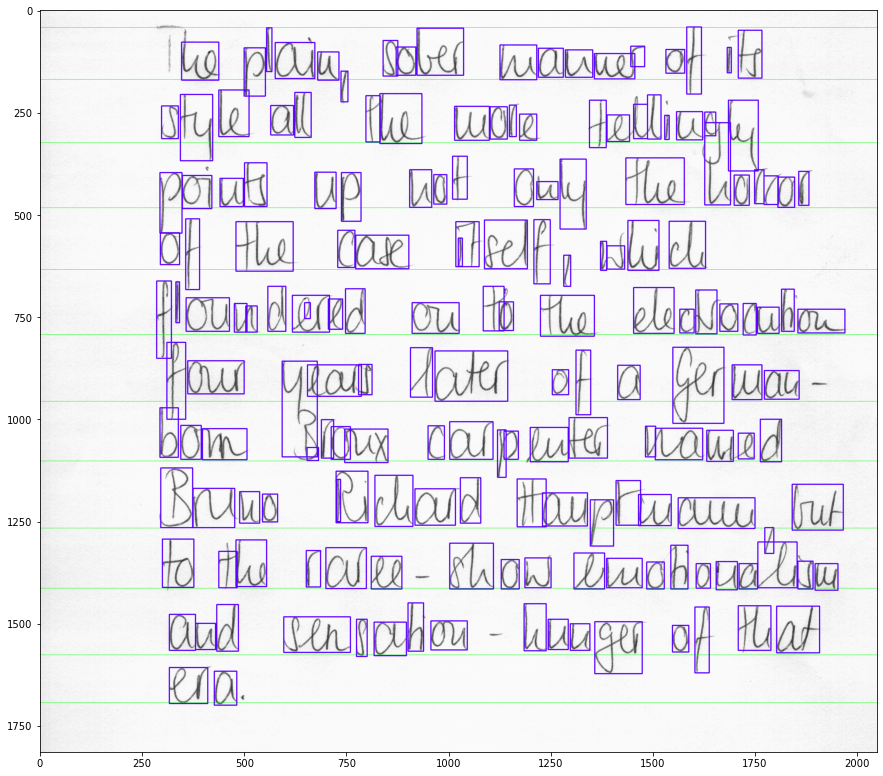

In [134]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)

plt.imshow(image)

In [ ]:
##################################################################################################################
##################################################################################################################

In [135]:
I = cv2.imread('problem2.png')

In [136]:
# Params
maxArea = 3000
minArea = 1000

In [137]:
# Convert to gray
Igray = cv2.cvtColor(I,cv2.COLOR_RGB2GRAY)

# Threshold
ret, Ithresh = cv2.threshold(Igray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Keep only small components but not to small
comp = cv2.connectedComponentsWithStats(Ithresh)

labels = comp[1]
labelStats = comp[2]
labelAreas = labelStats[:,4]

for compLabel in range(1,comp[0],1):

    if labelAreas[compLabel] > maxArea or labelAreas[compLabel] < minArea:
        labels[labels==compLabel] = 0

labels[labels>0] =  1

# Do dilation
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
IdilateText = cv2.morphologyEx(labels.astype(np.uint8),cv2.MORPH_DILATE,se)

# Find connected component again
comp = cv2.connectedComponentsWithStats(IdilateText)

# Draw a rectangle around the text
labels = comp[1]
labelStats = comp[2]
#labelAreas = labelStats[:,4]

for compLabel in range(1,comp[0],1):

    cv2.rectangle(I,(labelStats[compLabel,0],labelStats[compLabel,1]),(labelStats[compLabel,0]+labelStats[compLabel,2],labelStats[compLabel,1]+labelStats[compLabel,3]),(0,0,255),2)

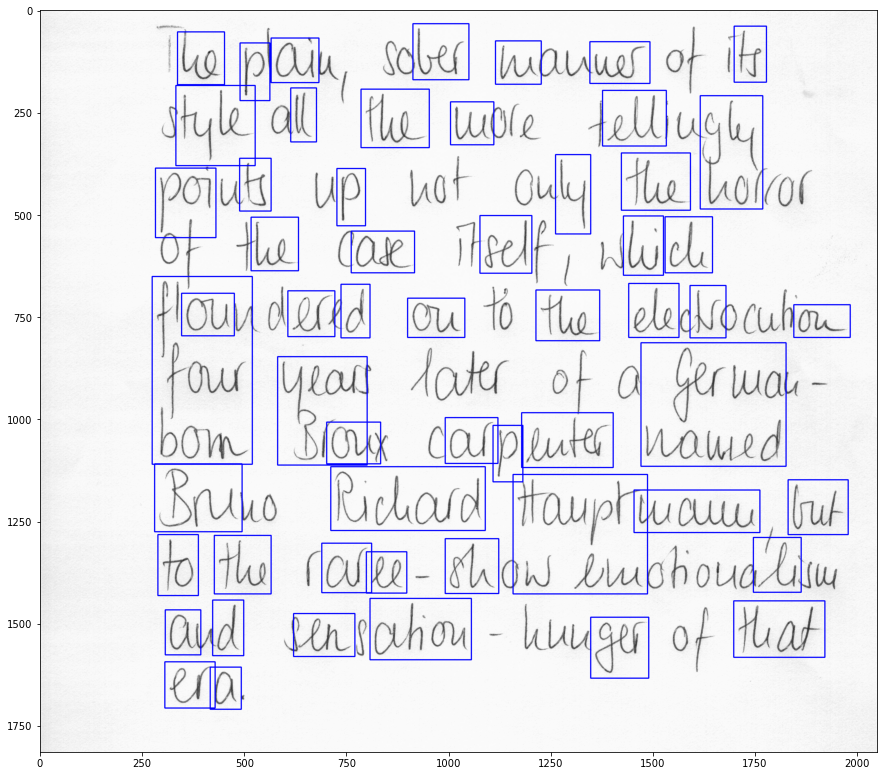

In [138]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)

plt.imshow(I)